Easy 1

In [11]:
#Answer = 5191
import pandas as pd
dfC = pd.read_json('https://raw.githubusercontent.com/carlyd2434/rawr/main/dim_customer.json')
unique_customers = len(dfC.id.unique())
print(unique_customers)

5191


,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


Easy 2

In [9]:
#Answer = ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys' 'Technology' 'Souvenir']; 8
import pandas as pd
dfI = pd.read_csv('https://raw.githubusercontent.com/carlyd2434/rawr/main/fct_invoice.csv')
unique_categories = dfI.category.unique()
unique_categories_count = len(unique_categories)
print(unique_categories)
print(unique_categories_count)

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
8


,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


Easy 3

In [51]:
#Answer = Cash; 44447 instances
import pandas as pd
dfI = pd.read_csv('https://raw.githubusercontent.com/carlyd2434/rawr/main/fct_invoice.csv')
payment_method_count = dfI['payment_method'].value_counts()
highest = payment_method_count.nlargest(1) 
print(highest)

payment_method
Cash    44447
Name: count, dtype: int64


Medium 1

In [72]:
'''
Answer: 
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
'''
import pandas as pd
dfI = pd.read_csv('https://raw.githubusercontent.com/carlyd2434/rawr/main/fct_invoice.csv')
dfI['sales'] = dfI['quantity']*dfI['price']
sums = dfI.groupby('category').sales.sum()
highest = sums.nlargest(3)
print(highest)

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: sales, dtype: float64


Medium 2

In [48]:
#Answer: 82039768.15
import pandas as pd
dfC = pd.read_json('https://raw.githubusercontent.com/carlyd2434/rawr/main/dim_customer.json')
dfI = pd.read_csv('https://raw.githubusercontent.com/carlyd2434/rawr/main/fct_invoice.csv')
old_id = dfC.loc[dfC['age']>45, 'id']
total_sales_above_45=0

for rawr in old_id:
    total_sales_above_45 += (dfI.loc[dfI['customer_id']==rawr, 'price']*(dfI.loc[dfI['customer_id']==rawr, 'quantity'])).sum()

print(total_sales_above_45)

82039768.1499996


Medium 3

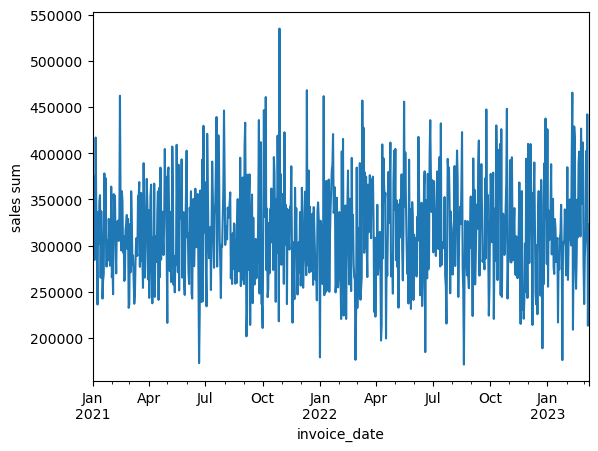

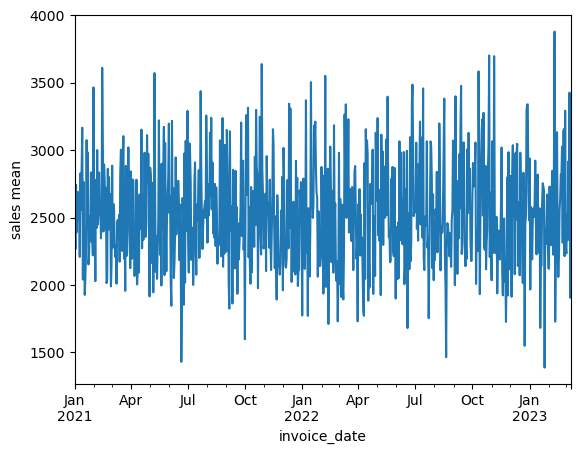

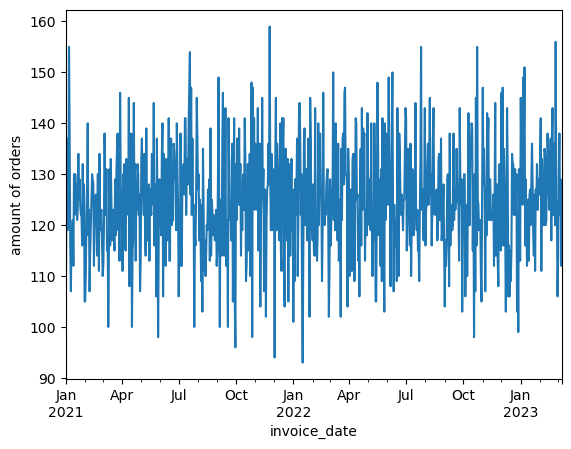

In [5]:
#The data seems to be distributed pretty evenly from the start of 2021 to early 2023. There seem to be order spikes during Novembers and Julys.
import pandas as pd
import matplotlib.pyplot as plt
dfI = pd.read_csv('https://raw.githubusercontent.com/carlyd2434/rawr/main/fct_invoice.csv')
dfI['invoice_date'] = pd.to_datetime(dfI['invoice_date'], format='%d/%m/%Y')
dfI.sort_values(by='invoice_date')
dfI['sales'] = dfI['quantity']*dfI['price']
dfI.groupby('invoice_date')['sales'].sum().plot(ylabel='sales sum')
plt.show()
dfI.groupby('invoice_date')['sales'].mean().plot(ylabel='sales mean')
plt.show()
dfI.groupby('invoice_date')['invoice_no'].count().plot(ylabel='amount of orders')
plt.show()

Hard

In [25]:
import pandas as pd
import numpy as np 
dfI = pd.read_csv('https://raw.githubusercontent.com/carlyd2434/rawr/main/fct_invoice.csv')
dfC = pd.read_json('https://raw.githubusercontent.com/carlyd2434/rawr/main/dim_customer.json')
dfI['sales'] = dfI['quantity']*dfI['price']
dfI['id'] = dfI['customer_id']
df = pd.merge(dfC,dfI,on='id')

df['age_bins']=pd.cut(df['age'], bins=[10,20,30,40,50,60,70,80,90,100],)

df.pivot_table(index='category',columns=['age_bins'],values='sales',aggfunc='sum',observed=False)

age_bins,"(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]","(80, 90]","(90, 100]"
category,,,,,,,,,
Books,19891.95,80128.35,84446.10,82946.25,79537.50,76234.80,56251.95,21103.95,0.0
Clothing,3029007.52,10079987.28,11516170.16,10933114.72,10819684.48,10004067.04,7871098.40,3739897.04,0.0
Cosmetics,178009.48,594733.82,722406.22,656740.32,621366.12,599735.00,427824.52,214684.80,0.0
Food & Beverage,20433.61,74271.23,89187.19,85034.57,77686.42,76127.88,55584.44,25334.12,0.0
Shoes,1367187.26,6152942.84,7178633.37,6775319.13,6268175.48,5499357.71,4718536.54,2125201.97,0.0
Souvenir,20128.68,53570.91,63705.63,65007.66,57594.30,51482.97,38439.21,20234.25,0.0
Technology,1772400.00,5049450.00,6231750.00,5840100.00,4662000.00,5218500.00,3773700.00,1449000.00,0.0
Toys,98273.28,380011.52,426460.16,378864.64,357002.24,340659.20,285608.96,126336.00,0.0
